# TSF - Task 3 - Exploratory Data Analysis for Reatail (USA)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from plotnine import *
%matplotlib inline

In [2]:
data_f = pd.read_csv('SampleSuperstore.csv')

In [3]:
data_f.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data_f.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data_f1 = data_f.drop(['Country','Postal Code'], axis=1)

In [7]:
data_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [8]:
data_f1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df1 = data_f1.groupby('Sub-Category').sum()
d_seg = data_f1.groupby('Segment').sum()
d_seg.reset_index(inplace = True) 
df1.reset_index(inplace = True) 
df1

,Sub-Category,Sales,Quantity,Discount,Profit
0,Accessories,167380.3180,2976,60.80,41936.6357
1,Appliances,107532.1610,1729,77.60,18138.0054
2,Art,27118.7920,3000,59.60,6527.7870
3,Binders,203412.7330,5974,567.00,30221.7633
4,Bookcases,114879.9963,868,48.14,-3472.5560
5,Chairs,328449.1030,2356,105.00,26590.1663
6,Copiers,149528.0300,234,11.00,55617.8249
7,Envelopes,16476.4020,906,20.40,6964.1767
8,Fasteners,3024.2800,914,17.80,949.5182
9,Furnishings,91705.1640,3563,132.40,13059.1436


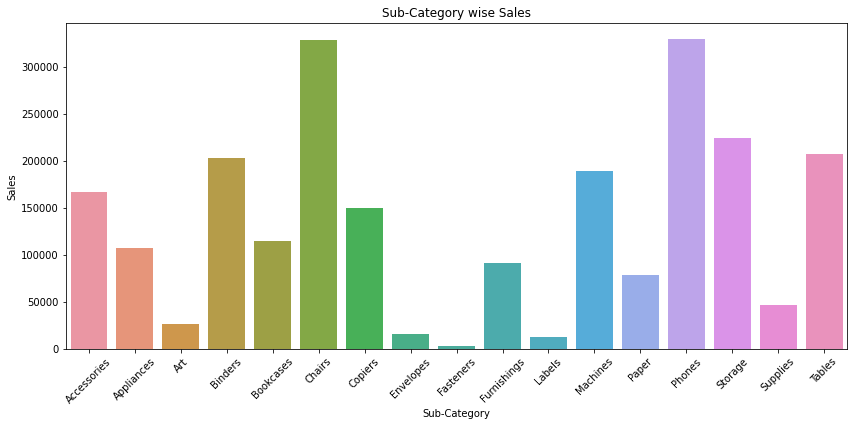

In [10]:
plt.figure(figsize=(14,6))
sns.barplot(x = "Sub-Category", y="Sales", data=df1)
plt.xticks(rotation = 45 )
plt.title('Sub-Category wise Sales')
plt.show()

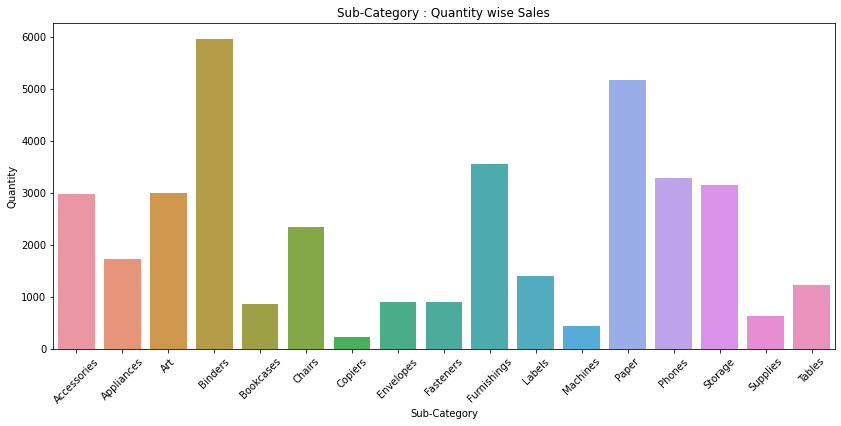

In [11]:
plt.figure(figsize=(14,6))
sns.barplot(x = "Sub-Category", y="Quantity", data=df1)
plt.xticks(rotation = 45 )
plt.title('Sub-Category : Quantity wise Sales')
plt.show()

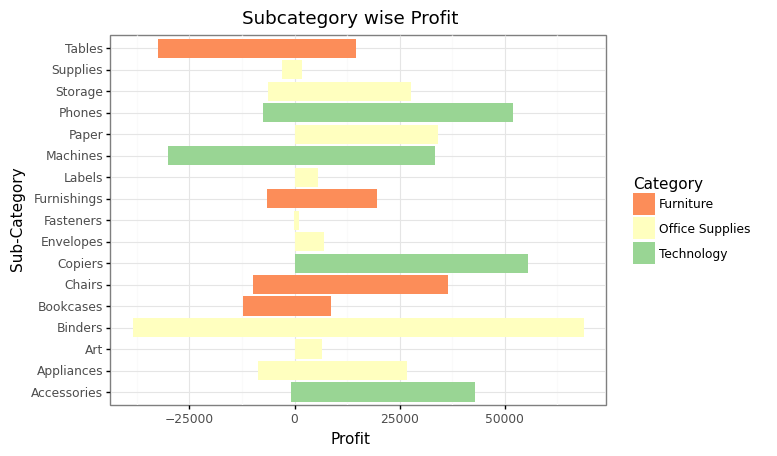

<ggplot: (8746972437047)>

In [12]:
profit_plot = (ggplot(data_f1, aes(x='Sub-Category', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('Subcategory wise Profit'))
display(profit_plot)

In [13]:
data_f1['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [14]:
df2 = data_f1.groupby('Category').sum()
df2.reset_index(inplace = True) 
df2

,Category,Sales,Quantity,Discount,Profit
0,Furniture,741999.7953,8028,368.89,18451.2728
1,Office Supplies,719047.0320,22906,947.80,122490.8008
2,Technology,836154.0330,6939,244.40,145454.9481


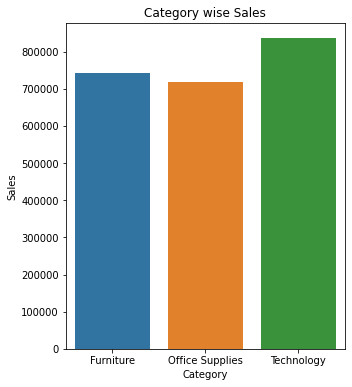

In [15]:
plt.figure(figsize=(5,6))
sns.barplot(x = "Category", y="Sales", data=df2)
plt.title('Category wise Sales')
plt.show()

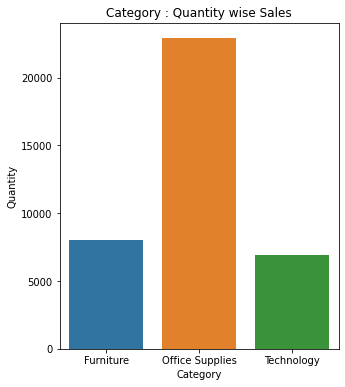

In [16]:
plt.figure(figsize=(5,6))
sns.barplot(x = "Category", y="Quantity", data=df2)
plt.title('Category : Quantity wise Sales')
plt.show()

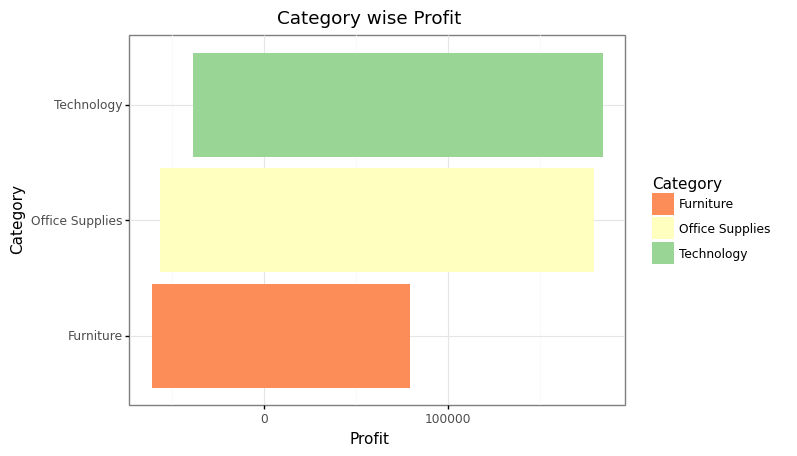

<ggplot: (8746972219227)>

In [17]:
profit_plot = (ggplot(data_f1, aes(x='Category', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('Category wise Profit'))
display(profit_plot)

###### From the Statistics above I draw the insight that Furniture Category needs reforms to improve the Profit/Loss Ratio

In [18]:
data_f1['City'].describe()

count              9994
unique              531
top       New York City
freq                915
Name: City, dtype: object

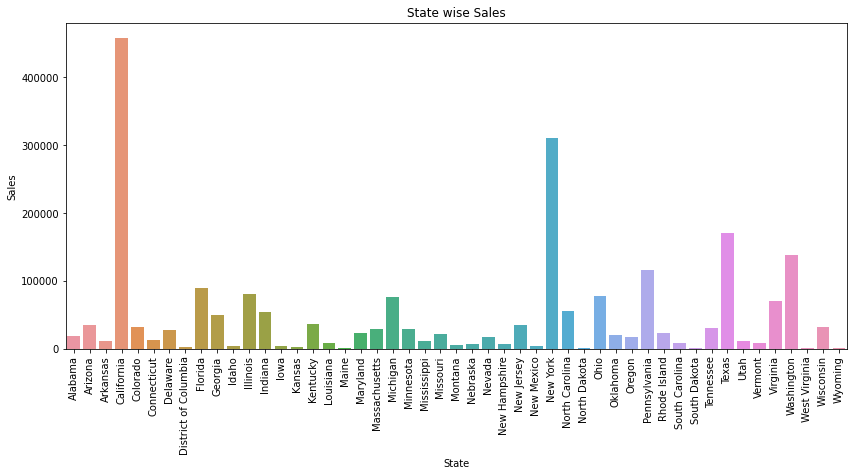

In [19]:
df3 = data_f1.groupby('State').sum()
df3.reset_index(inplace = True) 
plt.figure(figsize=(14,6))
sns.barplot(x = "State", y="Sales", data=df3)
plt.title('State wise Sales')
plt.xticks(rotation = 90)
plt.show()

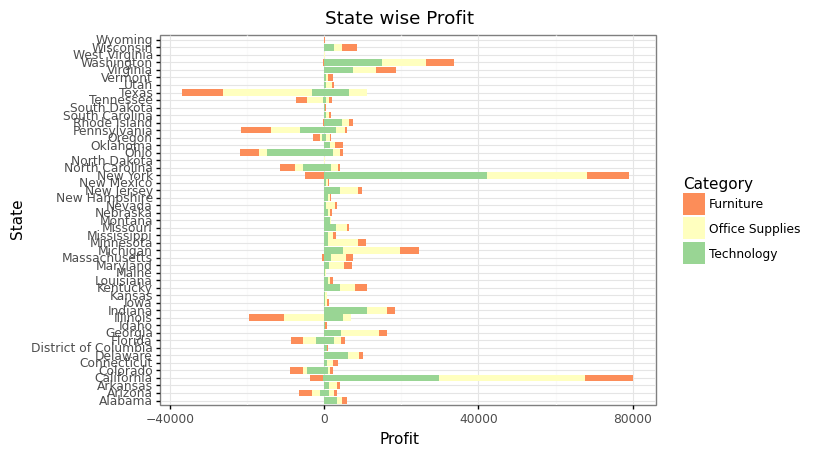

<ggplot: (8746972271535)>

In [20]:
profit_plot = (ggplot(data_f1, aes(x='State', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('State wise Profit'))
display(profit_plot)

###### From the above Statistics I draw the insights that - 
1.a) States that make most profit in Technology Category are :
- New York - California- Washington- Indiana - Virginia

1.b) States that make most loss in Technology Category are : 
- Ohio- North Carolina- Colorado- Pennsylvania

2. States that make most loss in Furniture Category are : 
- Texas- Pennsylvania- Illionis

3.a) States that make most profit in Office Supplies Category are :
- California - New York - Michigan

3.b) States that make most loss in Office Supplies Category are :
- Texas- Illionis

##### From the above two barplots I draw the insight that - 
The States with high sales are - 
- California - New York - Texas - Washington - Pennsylvania

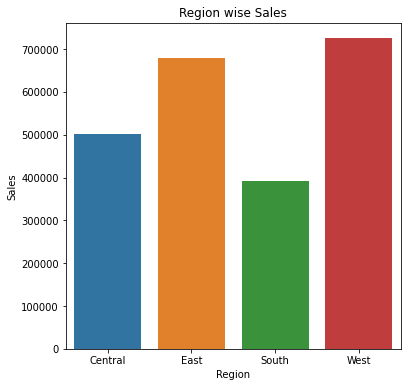

In [21]:
df4 = data_f1.groupby('Region').sum()
df4.reset_index(inplace = True) 
plt.figure(figsize=(6,6))
sns.barplot(x = "Region", y="Sales", data=df4)
plt.title('Region wise Sales')
plt.xticks(rotation = 0)
plt.show()

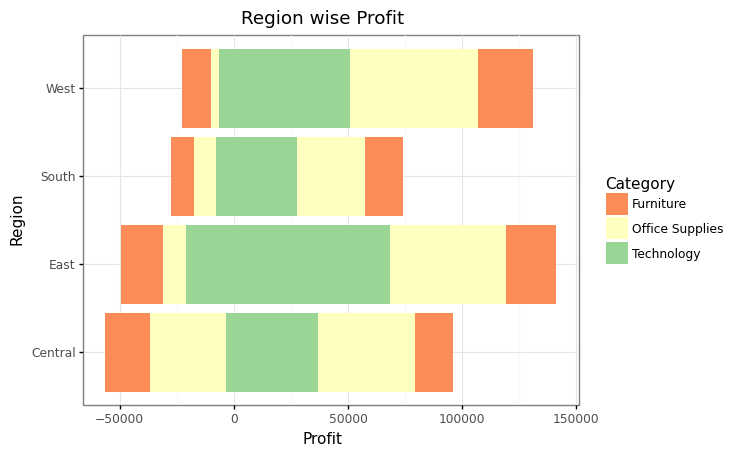

<ggplot: (8746972312441)>

In [22]:
profit_plot = (ggplot(data_f1, aes(x='Region', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('Region wise Profit'))
display(profit_plot)

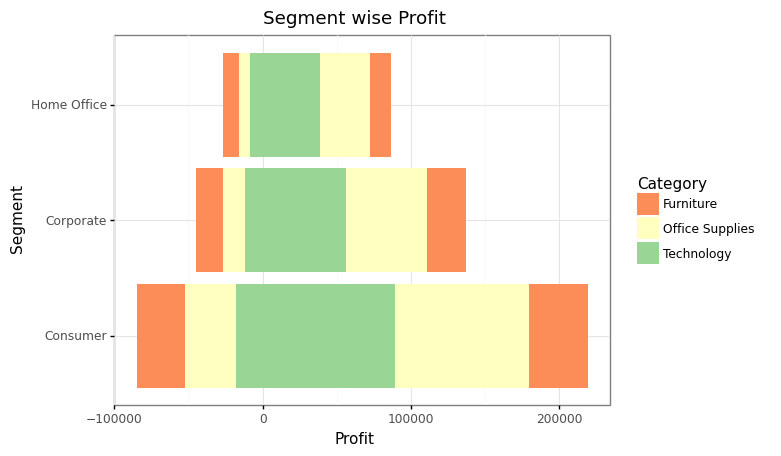

<ggplot: (8746972306604)>

In [23]:
profit_plot = (ggplot(data_f1, aes(x='Segment', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('Segment wise Profit'))
display(profit_plot)

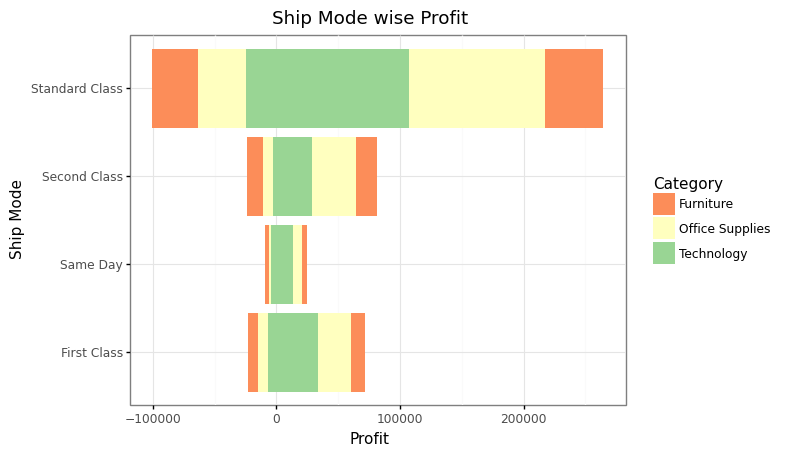

<ggplot: (8746972484714)>

In [24]:
profit_plot = (ggplot(data_f1, aes(x='Ship Mode', y='Profit' ,fill = 'Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type = 'div', palette="Spectral") + theme_bw() + ggtitle('Ship Mode wise Profit'))
display(profit_plot)

# Conclusion 

###### We can achieve more profit by clubbing an loss making entity with a profit making entity at one selling place.
Suppose from the above statistics lets take an example of Machines in the Technology category which makes no profit and the sales is at break-even. 
We can club Machines, i.e., a loss making entity with Accessories in the same category (Technology). By clubbing I mean that we can sell the Machines and give offers/Discount on Accessories along with it. So by this technique I think that sales of Machines will increase and along with it sales of Accessories will also increase but at an more discounted price.

Lets take another example of Tables and Chairs in the Furniture Category. In this category we have Tables as the loss making entity and the Chairs as the profit making entity.

###### I think this strategy should be used in the states such as Texas and Pennsylvania in which the we are facing most losses.

